# Logistic Regression
Logistic regression is an algorithm that classifies data based on its input features. It makes a model that makes a decision boundary for the data essentially separating, and the algorithm can take new input data and classify it. Here it is assumed that the reader knows a bit about how linear regression with gradient descent works.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset
The dataset I used was one I found which was about student's CGPA and GRE scores and each had a percentage change for entering a hypothetical university. I modified the data a bit so that it looks more clearly separated when plotted, and for it to have only 2 features to make it easier to plot. I used pandas to import the data as it is super easy to work with imported data in python using pandas.

The data was organized in two matrices, one with the features and one with the outputs. A column full of ones was inserted to the features matrix. Before that thought the features have to be scaled so that the training process happens faster. In this case I used mean normalization which turns the values of each column between 0 and 1 (or -1 to 1 if I had negative values) and also prevents overflows. The formula for mean normalization for one coulumn of features is:
$$
X' = \frac{X - \mu}{max(X) - min(X)}
$$
Where $ X' $ is the new or transformed coulumn matrix of the feature and $ \mu $ is the mean of the original column matirx of features.

In [5]:
data = pd.read_csv("Admission_Predict.csv", header=None, skiprows=1)  # Skips the first row as it is the header row
X = data[[0, 1]].to_numpy()  # Converts the data (in this case the features) into a numpy array
X = X.astype(np.float32)
X = (X - np.mean(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))  # Mean normalization
X = np.insert(X, 0, 1, axis=1)  # Adds the x0 column
y = data[2].to_numpy()  # Output column
y = y.astype(np.float32())

Since this is a classification algorithm, the data needs to be classified. I chose 0 and 1 as classifiers with 1 representing that the student will get accepted, with a decision boundary of 70% which I chose arbitrarily. This can be vizualized with a scatterplot with blue dots repressenting the data labeled as 1, and each axis being a feature.

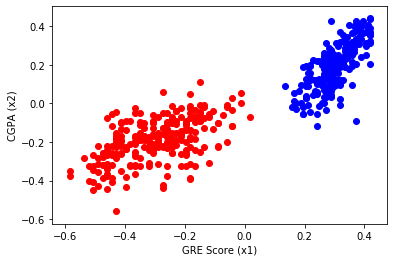

In [11]:
y = np.where( y >= 0.73, 1, 0)
color = {0: "red", 1: "blue"}
plot_1 = X[:, 1]
plot_2 = X[:, 2]
for i in np.unique(y):
    ix = np.where(y == i)
    plt.scatter(plot_1[ix], plot_2[ix], c=color[i])
plt.xlabel("GRE Score (x1)")
plt.ylabel("CGPA (x2)")
plt.show()

In the end the computer should be able to draw a straight line that separates the data.